# Data analysis of the... data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
%matplotlib inline
pd.set_option("display.max_columns", None)

## Exploratory data analysis

In [2]:
# Import the dataset
full_df = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_final.csv")
full_df.head()

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,IgE 500,IgE 250,IgE 125,IgE 62.5,IgE 31.25,IgE 15.625,IgE 7.8125,IgE 3.90625,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,Soy,Peas,Mung beans,Faba beans,Shiitake mushroom,Chickpea,Onion,Potato,Barley,Carrot,Brown rice,Basmati rice,White rice,Jasmine rice,Sushi rice,Wheat germ,Chicken breast,Soy #,Peas #,Mung beans #,Faba beans #,Shiitake #,Chickpea #,Onion #,Potato #,Barley #,Carrot #,Brown rice #,Basmati rice #,White rice #,Jasmine rice #,Sushi rice #,Wheat germ #,Chicken breast #,Q Garlic and Herb Fillets,Q Southern Fried Burgers,Q Hot and Spicy Burger,Q Brilliant Burgers,Q Garlic and Mushroom Escalope,Q Swedish style Balls,Q Crispy Nuggets,Q Sausages,Q Vegan Fillets,Q Southern Fried Bites,Q Mince,Q Pieces,F No-Meatballs,F The Big Fry Burger,F Fish Style Fillets,F Mediterranean Style Artisan Sausage,F Breakfast Bangers,F Golden Schnitzel,F Chicken Strips,F Spiced Burger,F Braai Sausages,F Chicken Nuggets,F Chicken Burgers,F Traditional Sausages,F Rice Protein and Chia Nuggets,F Traditional Burgers,F Soy and Flaxseed Schnitzels,F Spicy Sausages,F Quinoa and Brown Rice Burgers,F Battered Prawn Style Pieces,F Thick Cut Chunky Strips,F Mince,MM Burger,MM Hotdog,MM Meatballs,H Mediterranean chunks,Cultured meat,Q Garlic and Herb Fillets #,Q Southern Fried Burgers #,Q Hot and Spicy Burger #,Q Brilliant Burgers #,Q Garlic and Mushroom Escalope #,Q Swedish style Balls #,Q Crispy Nuggets #,Q Sausages #,Q Vegan Fillets #,Q Southern Fried Bites #,Q Mince #,Q Pieces #,F No-Meatballs #,F The Big Fry Burger #,F Fish Style Fillets #,F Mediterranean Style Artisan Sausage #,F Breakfast Bangers #,F Golden Schnitzel #,F Chicken Strips #,F Spiced Burger #,F Braai Sausages #,F Chicken Nuggets #,F Chicken Burgers #,F Traditional Sausages #,F Rice Protein and Chia Nuggets #,F Traditional Burgers #,F Soy and Flaxseed Schnitzels #,F Spicy Sausages #,F Quinoa and Brown Rice Burgers #,F Battered Prawn Style Pieces #,F Thick Cut Chunky Strips #,F Mince #,MM Burger #,MM Hotdog #,MM Meatballs #,H Mediterranean chunks #,Cultured meat #,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT COH,BSF-WT SBM,NC11,NC15,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,AF Chik'n Nugget,AF Chik'n Burger,v Classic Burger,v Chicken Burgers,v Bacon Bits,v Meatballs,v Mince,E Veg Ku Loh Meat,G Teriyaki Chick'N Strips,G Vegetarian Crabless cakes,S Mince,S Chicken style pieces,S Meat Burger,L Vegetarian Sausages,L Red Onion and Rosemary Sausages,B Mince,B Burger,B Original Sausage,B Italian Sausage,Y Luncheon meat,Y Mince meat,OM All Purpose,OM Strips,OM Luncheon,BRM Soy protein,TS Pea protein,TS Brown rice protein,O Chocolate plant protein powder,C Cricket protein powder,N Cricket flour,AIFS Cricket flour,SG Canned BSF,SG Dried BSF,SG Dried Crickets,IFT Dried BSF Larvae,Insectta BSF meal,AF Chik'n Nugget #,AF Chik'n Burger #,v Classic Burger #,v Chicken Burgers #,v Bacon Bits #,v Meatballs #,v Mince #,E Veg Ku Loh Meat #,G Teriyaki Chick'N Strips #,G Vegetarian Crabless cakes #,S Mince #,S Chicken style pieces #,S Meat Burger #,L Vegetarian Sausages #,L Red Onion and Rosemary Sausages #,B Mince #,B Burger #,B Original Sausage #,B Italian Sausage #,Y Luncheon meat #,Y Mince meat #,OM All Purpose #,OM Strips #,OM Luncheon #,BRM Soy protein #,TS Pea protein #,TS Brown rice protein #,O Chocolate plant protein powder #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,-1.097396,-0.733835,-0.093562,0.01,-0.853471,-0.978381,-2.38168

In [3]:
full_df.columns

Index(['ID', 'Panel', 'Batch', 'BSA', 'BB (with Urea)', 'BB (without Urea)',
       'PBS', 'PBS + Glycerol', 'pET32 (a) vector', 'IgE 1000',
       ...
       'SG Dried Crickets #', 'IFT Dried BSF Larvae #', 'Insectta BSF meal #',
       'BSF-D M<P', 'BSF-WT OKA', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS',
       'BSF-D COH', 'NC10'],
      dtype='object', length=246)

### Sanity check

We do this by plotting and finding the correlation between the dust mite crudes
It should be rather correlated

Equation: y = 0.3200425770140062*x + -0.2628287951166698
R2: 0.3515000169047511


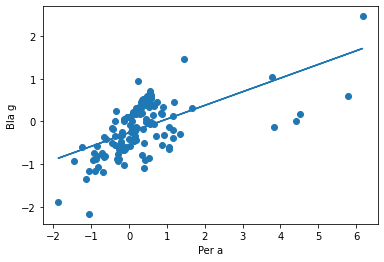

In [4]:
# Test new IgE curve
y = full_df["Bla g"]
x = full_df["Per a"]

# Plot scatterplot
plt.scatter(x, y)

# Add trendline
degree = 1
# m, b = np.polyfit(ige_level, ige, degree)
m, b, r, p_value, se = stats.linregress(x, y)
plt.plot(x, m*x + b)

plt.xlabel("Per a")
plt.ylabel("Bla g")

# Print equation and R2
print(f"Equation: y = {m}*x + {b}")
print(f"R2: {r ** 2}")

Split up the dataset into its groups
- Plant-based
- Fungal-based
- Insect-based
- Cultured meat

In [5]:
# Do some column shifting to make it easier to split

# 31 to 47 (Soy to wheat germ), 77 to 101 (plant foods), 
# 167 to 195 (plant foods)
plant_df = pd.concat([full_df.iloc[:,31:47], full_df.iloc[:,77:101], 
                      full_df.iloc[:,167:191]], axis=1)
# 48 to 64 (cooked veg), 114 to 138 (cooked plant foods), 
# 203 to 231 (cooked plant foods)
plant_cooked = pd.concat([full_df.iloc[:,48:64], full_df.iloc[:,114:138], 
                          full_df.iloc[:,203:231]], axis=1)

# 35 (shiitake), 65 to 77 (Quorn)
fungal_df = pd.concat([full_df.iloc[:,35], full_df.iloc[:,65:77]], 
                      axis=1)
# 52 (cooked shiitake), 102 to 114 (cooked Quorn)
fungal_cooked = pd.concat([full_df.iloc[:,52], full_df.iloc[:,102:114]], 
                          axis=1)

# 18 to 31 (insect and seafood crudes/allergens), 142 to 147 (cricket and BSF
# proteins), 139 to 142 (BSF WT), 147 to 150 (BSF WT), 240 (BSF WT), 
# 239 (BSF D), 241 to 246 (BSF D and cricket), 150 to 152 (cricket),
# 195 to 203 (insect products)
insect_df = pd.concat([full_df.iloc[:,18:31], full_df.iloc[:,142:147],
                       full_df.iloc[:,139:142], full_df.iloc[:,147:150],
                       full_df.iloc[:,240], full_df.iloc[:,239],
                       full_df.iloc[:,241:246], full_df.iloc[:,150:152],
                       full_df.iloc[:,195:203]], 
                      axis=1)
# Shift around so that BSF and cricket stuff are separate
insect_df = insect_df[['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'SGC Arginine kinase', 'BSF-WT CF70', 'BSF-WT P', 'BSF-WT PKM',
       'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH', 
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF', 'SG Dried BSF',
       'NC10', 'NC11', 'NC15', 'C Cricket protein powder', 'N Cricket flour',
       'SG Dried Crickets', 'AIFS Cricket flour']]
# 152 to 167 (cooked BSF WT, BSF D, cricket), 231 to 239 (cooked insect products)
insect_cooked = pd.concat([full_df.iloc[:,152:167], full_df.iloc[:,231:239]], 
                          axis=1)

cultured_df = full_df[["Chicken breast", "Cultured meat"]]
cultured_cooked = full_df[["Chicken breast #", "Cultured meat #"]]

Export just the insect components for clustering in R

In [6]:
# Include phenotype
# import dataset with phenotype
pheno_df = pd.read_csv("C:/FYP/Analysis/ours_case_control2.csv")
pheno_df.head()

# Convert ID into int
pheno_df["ID"] = pheno_df["ID"].apply(lambda x: int(x[3:]))

# Keep only the relevant columns
# Figure to keep the values as int or convert to categorical
pheno_df = pheno_df[["ID", "AR_class", "AD_class", "asthma_class", "SPT_0"]]

# Filter relevant IDs
# common_id = 
full_insect = pd.concat([insect_df, insect_cooked], axis=1)
relv_df = full_insect.loc[full_df["ID"].isin(pheno_df["ID"])]
relv_df = relv_df.reset_index()

# Add the insect stuff to the back of pheno_df
insect_cluster = pd.concat([pheno_df, full_insect], axis=1, join="inner")
insect_cluster.head()

,ID,AR_class,AD_class,asthma_class,SPT_0,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF-WT COH,BSF-WT SBM,BSF-WT OKA,BSF-D M<P,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,IFT Dried BSF Larvae,Insectta BSF meal,SG Canned BSF,SG Dried BSF,NC10,NC11,NC15,C Cricket protein powder,N Cricket flour,SG Dried Crickets,AIFS Cricket flour,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #
0,1,0,0,0,0,-1.386305,-1.730191,-1.855242,-0.022991,0.060144,0.462012,0.212695,0.332979,0.454364,0.325848,0.410197,0.503529,0.196145,-0.015686,-0.060733,-0.044369,-0.315912,-0.580576,-0.944178,0.075952,0.051187,0.156720,0.396418,0.395809,-0.467450,-0.343432,-0.735091,-0.618637,-0.901311,-0.984302,0.548342,0.658636,0.613418,0.590639,-1.472121,0.114991,0.059441,0.488669,0.390547,0.568588,0.568460,0.039594,-0.115797,-0.313980,-0.602085,-0.135291,0.261065,0.360473,0.321338,0.321582,0.194667,0.266085,0.398888,0.413705,0.455633,0.489274,-0.127910,-0.126120,-0.046768,-0.087690,-0.105779,-0.156909,-0.238642,-0.139686
1,2,9,9,0,0,-0.127862,0.143371,0.764429,-0.858771,-1.563234,0.710864,0.030593,2.761839,0.241084,-0.348671,-0.379653,-0.569956,-0.555498,-0.127034,-0.207426,-0.320453,-0.587388,-0.918416,-1.063764,0.361910,0.285053,0.480096,0.509748,0.589002,-0.504154,-0.441848,-1.111662,-1.387428,-1.064265,-1.064819,0.878597,0.792707,0.814664,0.878736,-1.657821,0.306789,0.230090,0.373586,1.095774,0.893618,0.772627,0.115760,-0.027092,-0.317487,-0.726230,-0.308276,0.238449,0.299316,0.221894,0.617917,0.565143,0.690052,0.939275,0.809083,0.773684,0.680823,-0.088229,0.091447,-0.156406,-0.175592,-0.059581,-0.096126,-0.276785,-0.093427
2,4,0,0,9,0,-1.200136,-0.786379,-0.188413,-0.842490,-1.643466,-0.136186,-0.758102,-0.335222,-0.502188,-0.218968,-0.630791,-0.651847,-0.904331,-0.163613,-0.198885,-0.244776,-0.653117,-1.036032,-0.851577,0.493176,0.262464,0.323220,0.206668,0.254277,-0.203525,-0.136182,-0.715948,-0.661298,-0.697786,-0.901474,0.896490,0.614973,0.871583,0.938201,-1.175563,0.329555,0.295379,0.397813,0.226039,0.891665,0.833731,0.260269,0.069250,-0.168142,-0.467835,-0.553913,-0.172477,0.024515,0.402101,0.473087,0.628026,0.700143,0.937725,0.999630,0.900818,0.776888,-0.273746,-0.428565,0.011548,0.017034,0.024689,0.093745,-0.076996,-0.066250
3,5,0,9,0,9,-1.814770,-1.720151,-1.512526,-0.065037,-0.580990,0.402162,-0.354597,-0.458381,-1.022442,-0.141873,-0.004942,-0.804424,-0.428440,-0.124973,0.189685,0.625803,0.839197,1.357557,0.581583,-0.966777,-0.832391,-0.403522,-0.169563,-0.060043,1.095122,0.806325,1.510305,3.661616,0.984720,1.129645,0.059982,0.209917,-1.126314,-0.642972,0.979141,-0.518205,-0.399425,-1.158672,-2.044062,-0.434226,-1.428279,-0.110636,0.424847,0.318499,0.362448,0.216638,0.090777,0.064644,-0.357818,-0.896532,-1.253783,-1.319557,-1.521953,-1.397401,-1.297218,-0.848773,0.145951,-0.146358,0.045776,0.488233,0.493939,0.377146,0.544853,0.885370
4,8,9,9,9,9,-0.264470,-0.288295,-0.460875,-0.084759,-0.137151,0.395973,0.273313,0.814905,0.358299,0.297755,0.490519,0.031251,0.446607,0.552377,0.837529,1.045694,1.385584,1.441102,1.287279,-1.486553,-1.687276,-1.750957,-0.190356,-1.123217,1.687042,1.769915,2.471833,4.559485,1.672737,3.575837,0.232405,2.101512,0.385145,0.709185,2.014895,0.229207,0.431258,0.510720,9.504796,0.420509,0.199954,0.595560,0.781768,0.652581,1.269963,1.253590,0.386973,-0.174085,0.365448,-1.231343,1.896854,-1.014500,1.216209,-0.757413,0.048123,0.249230,3.217772,12.178166,2.021216,2.326772,2.357205,1.352732,1.897993,2.451461


In [592]:
insect_cluster

,ID,AR_class,AD_class,asthma_class,SPT_0,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF-WT COH,BSF-WT SBM,BSF-WT OKA,BSF-D M<P,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,IFT Dried BSF Larvae,Insectta BSF meal,SG Canned BSF,SG Dried BSF,NC10,NC11,NC15,C Cricket protein powder,N Cricket flour,SG Dried Crickets,AIFS Cricket flour,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #
0,1,0,0,0,0,-1.386305,-1.730191,-1.855242,-0.022991,0.060144,0.462012,0.212695,0.332979,0.454364,0.325848,0.410197,0.503529,0.196145,-0.015686,-0.060733,-0.044369,-0.315912,-0.580576,-0.944178,0.075952,0.051187,0.156720,0.396418,0.395809,-0.467450,-0.343432,-0.735091,-0.618637,-0.901311,-0.984302,0.548342,0.658636,0.613418,0.590639,-1.472121,0.114991,0.059441,0.488669,0.390547,0.568588,0.568460,0.039594,-0.115797,-0.313980,-0.602085,-0.135291,0.261065,0.360473,0.321338,0.321582,0.194667,0.266085,0.398888,0.413705,0.455633,0.489274,-0.127910,-0.126120,-0.046768,-0.087690,-0.105779,-0.156909,-0.238642,-0.139686
1,2,9,9,0,0,-0.127862,0.143371,0.764429,-0.858771,-1.563234,0.710864,0.030593,2.761839,0.241084,-0.348671,-0.379653,-0.569956,-0.555498,-0.127034,-0.207426,-0.320453,-0.587388,-0.918416,-1.063764,0.361910,0.285053,0.480096,0.509748,0.589002,-0.504154,-0.441848,-1.111662,-1.387428,-1.064265,-1.064819,0.878597,0.792707,0.814664,0.878736,-1.657821,0.306789,0.230090,0.373586,1.095774,0.893618,0.772627,0.115760,-0.027092,-0.317487,-0.726230,-0.308276,0.238449,0.299316,0.221894,0.617917,0.565143,0.690052,0.939275,0.809083,0.773684,0.680823,-0.088229,0.091447,-0.156406,-0.175592,-0.059581,-0.096126,-0.276785,-0.093427
2,4,0,0,9,0,-1.200136,-0.786379,-0.188413,-0.842490,-1.643466,-0.136186,-0.758102,-0.335222,-0.502188,-0.218968,-0.630791,-0.651847,-0.904331,-0.163613,-0.198885,-0.244776,-0.653117,-1.036032,-0.851577,0.493176,0.262464,0.323220,0.206668,0.254277,-0.203525,-0.136182,-0.715948,-0.661298,-0.697786,-0.901474,0.896490,0.614973,0.871583,0.938201,-1.175563,0.329555,0.295379,0.397813,0.226039,0.891665,0.833731,0.260269,0.069250,-0.168142,-0.467835,-0.553913,-0.172477,0.024515,0.402101,0.473087,0.628026,0.700143,0.937725,0.999630,0.900818,0.776888,-0.273746,-0.428565,0.011548,0.017034,0.024689,0.093745,-0.076996,-0.066250
3,5,0,9,0,9,-1.814770,-1.720151,-1.512526,-0.065037,-0.580990,0.402162,-0.354597,-0.458381,-1.022442,-0.141873,-0.004942,-0.804424,-0.428440,-0.124973,0.189685,0.625803,0.839197,1.357557,0.581583,-0.966777,-0.832391,-0.403522,-0.169563,-0.060043,1.095122,0.806325,1.510305,3.661616,0.984720,1.129645,0.059982,0.209917,-1.126314,-0.642972,0.979141,-0.518205,-0.399425,-1.158672,-2.044062,-0.434226,-1.428279,-0.110636,0.424847,0.318499,0.362448,0.216638,0.090777,0.064644,-0.357818,-0.896532,-1.253783,-1.319557,-1.521953,-1.397401,-1.297218,-0.848773,0.145951,-0.146358,0.045776,0.488233,0.493939,0.377146,0.544853,0.885370
4,8,9,9,9,9,-0.264470,-0.288295,-0.460875,-0.084759,-0.137151,0.395973,0.273313,0.814905,0.358299,0.297755,0.490519,0.031251,0.446607,0.552377,0.837529,1.045694,1.385584,1.441102,1.287279,-1.486553,-1.687276,-1.750957,-0.190356,-1.123217,1.687042,1.769915,2.471833,4.559485,1.672737,3.575837,0.232405,2.101512,0.385145,0.709185,2.014895,0.229207,0.431258,0.510720,9.504796,0.420509,0.199954,0.595560,0.781768,0.652581,1.269963,1.253590,0.386973,-0.174085,0.365448,-1.231343,1.896854,-1.014500,1.216209,-0.757413,0.048123,0.249230,3.217772,12.178166,2.021216,2.326772,2.357205,1.352732,1.897993,2.451461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [605]:
# Export it
insect_cluster.to_csv("insect_cluster.csv", index=False)

Plot some correlation within each dataset

Some parts of the heat map have empty rows/columns. This means that their values are all 0

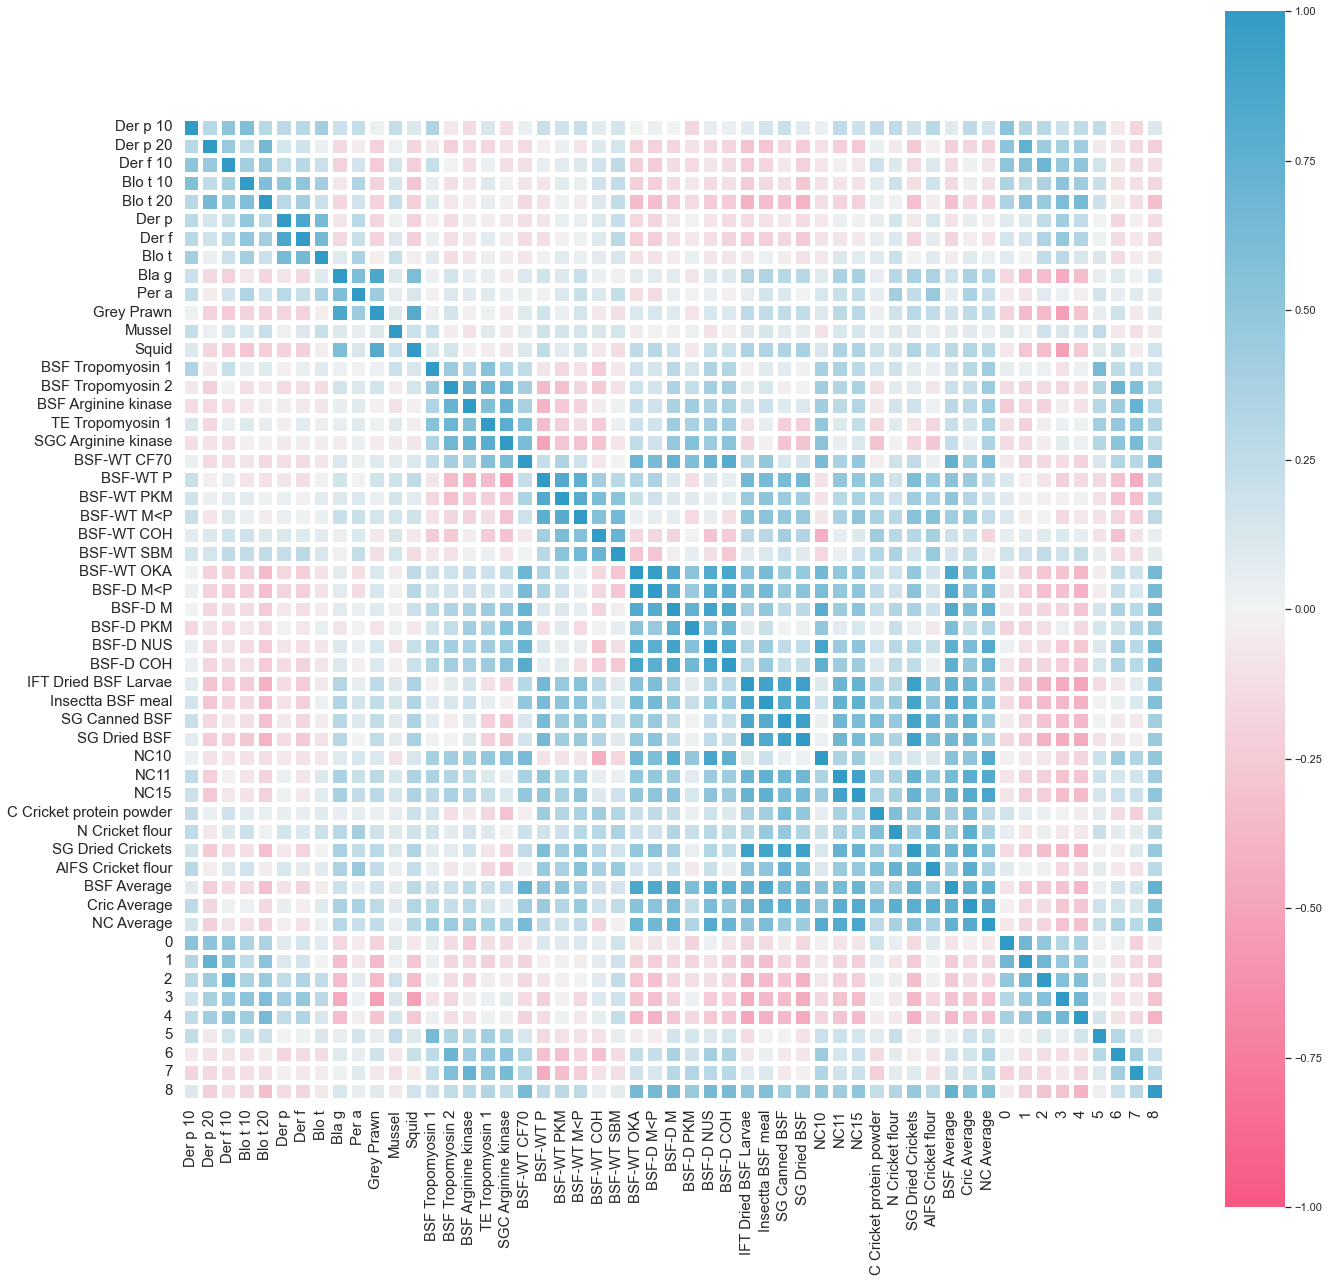

In [440]:
# Heat map with seaborn
# dataset to work on
df = insect_df

plt.figure(figsize = (22,22))
# Color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
corrMatrix = df.corr()

hm = sns.heatmap(corrMatrix, linewidths=5, cmap=cmap, square=True, vmin=-1, vmax=1)
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=15)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Swarmplots

In [6]:
# Import absorbance datasets
panel1_abs = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_scaled/1-full-pbs-minus.csv")
panel2_abs = pd.read_csv("C:/FYP/Analysis/Excel analysis/No norm, average IgE/linear_scaled/2-full-pbs-minus.csv")

In [7]:
# The panels have to be converted into 2 columns: Absorbance and allergen
# Remove blank
panel1_abs = panel1_abs[panel1_abs["ID"] != "B"]
panel2_abs = panel2_abs[panel2_abs["ID"] != "B"]

# Melt them using ID as the id_vars
panel1_melt = pd.melt(panel1_abs, id_vars=["ID"], 
                      value_vars=panel1_abs.columns[16:])
panel2_melt = pd.melt(panel2_abs, id_vars=["ID"], 
                      value_vars=panel2_abs.columns[16:])

In [11]:
panel1_melt.shape

(15851, 3)

In [8]:
# Split the columns into groups of 10
columns1 = []
columns2 = []

groupin = 10

i = 0
while i < len(panel1_melt["variable"].unique())-1:
    columns = []
    for j in range(groupin):
        columns.append(panel1_melt["variable"].unique()[i])
        i += 1
        if i > len(panel1_melt["variable"].unique())-1:
            break
    columns1.append(columns)
    
i = 0
while i < len(panel2_melt["variable"].unique())-1:
    columns = []
    for j in range(groupin):
        columns.append(panel2_melt["variable"].unique()[i])
        i += 1
        if i > len(panel2_melt["variable"].unique())-1:
            break
    columns2.append(columns)

In [9]:
# Find the max and min values for better plotting
print(f"Panel 1 max: {panel1_melt.max()}")
print(f"Panel 1 min: {panel1_melt.min()}")
print(f"Panel 2 max: {panel2_melt.max()}")
print(f"Panel 2 min: {panel2_melt.min()}")

Panel 1 max: ID                     8
variable    White rice #
value        224873.0834
dtype: object
Panel 1 min: ID                    1
variable         Barley
value      -107029.6375
dtype: object
Panel 2 max: ID                    8
variable      v Mince #
value       275558.8702
dtype: object
Panel 2 min: ID                         1
variable    AF Chik'n Burger
value           -77294.27376
dtype: object


In [74]:
columns1[0]

['Der p 10',
 'Der p 20',
 'Der f 10',
 'Blo t 10',
 'Blo t 20',
 'Der p',
 'Der f',
 'Blo t',
 'Bla g',
 'Per a']

#### For using the full dataset IgE

In [333]:
# Get the controls
control_id = [1, 2, 4, 10, 14, 15, 27, 61, 74, 131, 142, 146, 162, 169, 219, 220, 266, 351, 427, 489, 520, 728, 738]
control_df = full_df[full_df["ID"].isin(control_id)]
control_df.head()

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,IgE 500,IgE 250,IgE 125,IgE 62.5,IgE 31.25,IgE 15.625,IgE 7.8125,IgE 3.90625,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,Soy,Peas,Mung beans,Faba beans,Shiitake mushroom,Chickpea,Onion,Potato,Barley,Carrot,Brown rice,Basmati rice,White rice,Jasmine rice,Sushi rice,Wheat germ,Chicken breast,Soy #,Peas #,Mung beans #,Faba beans #,Shiitake #,Chickpea #,Onion #,Potato #,Barley #,Carrot #,Brown rice #,Basmati rice #,White rice #,Jasmine rice #,Sushi rice #,Wheat germ #,Chicken breast #,Q Garlic and Herb Fillets,Q Southern Fried Burgers,Q Hot and Spicy Burger,Q Brilliant Burgers,Q Garlic and Mushroom Escalope,Q Swedish style Balls,Q Crispy Nuggets,Q Sausages,Q Vegan Fillets,Q Southern Fried Bites,Q Mince,Q Pieces,F No-Meatballs,F The Big Fry Burger,F Fish Style Fillets,F Mediterranean Style Artisan Sausage,F Breakfast Bangers,F Golden Schnitzel,F Chicken Strips,F Spiced Burger,F Braai Sausages,F Chicken Nuggets,F Chicken Burgers,F Traditional Sausages,F Rice Protein and Chia Nuggets,F Traditional Burgers,F Soy and Flaxseed Schnitzels,F Spicy Sausages,F Quinoa and Brown Rice Burgers,F Battered Prawn Style Pieces,F Thick Cut Chunky Strips,F Mince,MM Burger,MM Hotdog,MM Meatballs,H Mediterranean chunks,Cultured meat,Q Garlic and Herb Fillets #,Q Southern Fried Burgers #,Q Hot and Spicy Burger #,Q Brilliant Burgers #,Q Garlic and Mushroom Escalope #,Q Swedish style Balls #,Q Crispy Nuggets #,Q Sausages #,Q Vegan Fillets #,Q Southern Fried Bites #,Q Mince #,Q Pieces #,F No-Meatballs #,F The Big Fry Burger #,F Fish Style Fillets #,F Mediterranean Style Artisan Sausage #,F Breakfast Bangers #,F Golden Schnitzel #,F Chicken Strips #,F Spiced Burger #,F Braai Sausages #,F Chicken Nuggets #,F Chicken Burgers #,F Traditional Sausages #,F Rice Protein and Chia Nuggets #,F Traditional Burgers #,F Soy and Flaxseed Schnitzels #,F Spicy Sausages #,F Quinoa and Brown Rice Burgers #,F Battered Prawn Style Pieces #,F Thick Cut Chunky Strips #,F Mince #,MM Burger #,MM Hotdog #,MM Meatballs #,H Mediterranean chunks #,Cultured meat #,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT COH,BSF-WT SBM,NC11,NC15,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,AF Chik'n Nugget,AF Chik'n Burger,v Classic Burger,v Chicken Burgers,v Bacon Bits,v Meatballs,v Mince,E Veg Ku Loh Meat,G Teriyaki Chick'N Strips,G Vegetarian Crabless cakes,S Mince,S Chicken style pieces,S Meat Burger,L Vegetarian Sausages,L Red Onion and Rosemary Sausages,B Mince,B Burger,B Original Sausage,B Italian Sausage,Y Luncheon meat,Y Mince meat,OM All Purpose,OM Strips,OM Luncheon,BRM Soy protein,TS Pea protein,TS Brown rice protein,O Chocolate plant protein powder,C Cricket protein powder,N Cricket flour,AIFS Cricket flour,SG Canned BSF,SG Dried BSF,SG Dried Crickets,IFT Dried BSF Larvae,Insectta BSF meal,AF Chik'n Nugget #,AF Chik'n Burger #,v Classic Burger #,v Chicken Burgers #,v Bacon Bits #,v Meatballs #,v Mince #,E Veg Ku Loh Meat #,G Teriyaki Chick'N Strips #,G Vegetarian Crabless cakes #,S Mince #,S Chicken style pieces #,S Meat Burger #,L Vegetarian Sausages #,L Red Onion and Rosemary Sausages #,B Mince #,B Burger #,B Original Sausage #,B Italian Sausage #,Y Luncheon meat #,Y Mince meat #,OM All Purpose #,OM Strips #,OM Luncheon #,BRM Soy protein #,TS Pea protein #,TS Brown rice protein #,O Chocolate plant protein powder #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,-1.097396,-0.733835,-0.093562,0.01,-0.853471,-0.978381,-2.38168

In [279]:
# Find false positive rates given a cut-off
# False positive here is defined as percentage of controls that have sIgE levels higher
# than the cut-off
cut_off = 0.35

print("Der p: " + str(len(full_df[full_df["Der p"] > cut_off]) / len(full_df)))
print("Blo t: " + str(len(full_df[full_df["Blo t"] > cut_off]) / len(full_df)))
print("Bla g: " + str(len(full_df[full_df["Bla g"] > cut_off]) / len(full_df)))
print("Per a: " + str(len(full_df[full_df["Per a"] > cut_off]) / len(full_df)))

Der p: 0.7633587786259542
Blo t: 0.6870229007633588
Bla g: 0.4198473282442748
Per a: 0.6183206106870229


In [335]:
# For using the full dataset
# Split into 10, remove first few controls
relv_df = full_df.iloc[:,18:]

relv_melt = pd.melt(relv_df)

# Split the columns into groups of 10
relv_columns = []

groupin = 10

i = 0
while i < len(relv_df.columns)-1:
    columns = []
    for j in range(groupin):
        columns.append(relv_df.columns[i])
        i += 1
        if i > len(relv_df.columns)-1:
            break
    relv_columns.append(columns)

In [336]:
relv_df.values.max()
relv_df.values.min()

-6.82096571374677

Text(0.5, 0, 'Allergen')

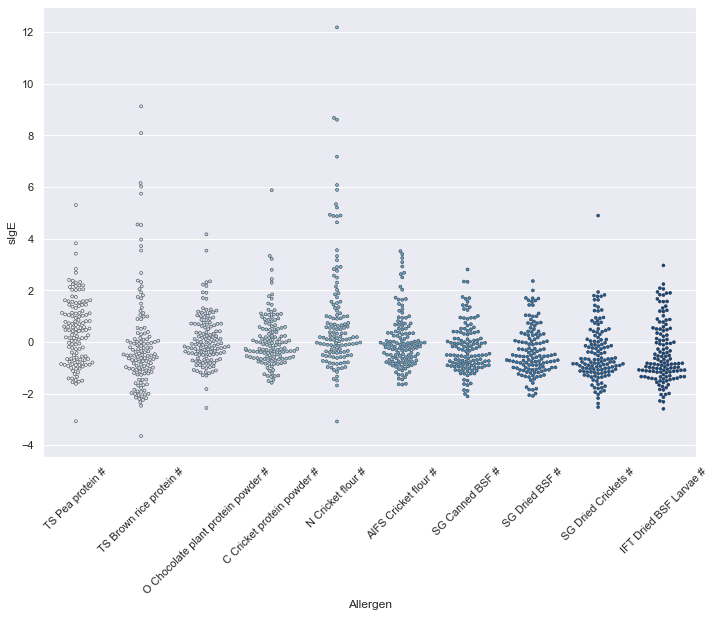

In [343]:
# sns.violinplot(x="variable", y="value", data=panel1_melt.iloc[2000:4000,:])
# sns.stripplot(x="variable", y="value", data=panel1_melt.iloc[2000:4000,:])
sns.set(rc={'figure.figsize':(11.7,8.27)})

data = relv_melt[relv_melt.variable.isin(relv_columns[21])]

# graph = sns.swarmplot(x="variable", y="value", data=data,
#               size=3)
graph = sns.swarmplot(x="variable", y="value", data=data,
                      size=3, palette="Blues", linewidth=0.5)
# graph.axhline(y=0.35, color="blue", linestyle="--")

plt.xticks(rotation=45)
plt.ylabel("sIgE")
plt.xlabel("Allergen")

# ax = plt.gca()
# ax.set_ylim([-700, 1500])

### Determine sensitisation cut-off

Might have to remove outliers if some controls have overly high values

In [4]:
control_id = [1, 2, 4, 10, 14, 15, 27, 61, 74, 131, 142, 146, 162, 169, 219, 220, 266, 351, 427, 489, 520, 728, 738]
control_df = full_df[full_df["ID"].isin(control_id)]
control_df.head()

,ID,Panel,Batch,BSA,BB (with Urea),BB (without Urea),PBS,PBS + Glycerol,pET32 (a) vector,IgE 1000,IgE 500,IgE 250,IgE 125,IgE 62.5,IgE 31.25,IgE 15.625,IgE 7.8125,IgE 3.90625,Der p 10,Der p 20,Der f 10,Blo t 10,Blo t 20,Der p,Der f,Blo t,Bla g,Per a,Grey Prawn,Mussel,Squid,Soy,Peas,Mung beans,Faba beans,Shiitake mushroom,Chickpea,Onion,Potato,Barley,Carrot,Brown rice,Basmati rice,White rice,Jasmine rice,Sushi rice,Wheat germ,Chicken breast,Soy #,Peas #,Mung beans #,Faba beans #,Shiitake #,Chickpea #,Onion #,Potato #,Barley #,Carrot #,Brown rice #,Basmati rice #,White rice #,Jasmine rice #,Sushi rice #,Wheat germ #,Chicken breast #,Q Garlic and Herb Fillets,Q Southern Fried Burgers,Q Hot and Spicy Burger,Q Brilliant Burgers,Q Garlic and Mushroom Escalope,Q Swedish style Balls,Q Crispy Nuggets,Q Sausages,Q Vegan Fillets,Q Southern Fried Bites,Q Mince,Q Pieces,F No-Meatballs,F The Big Fry Burger,F Fish Style Fillets,F Mediterranean Style Artisan Sausage,F Breakfast Bangers,F Golden Schnitzel,F Chicken Strips,F Spiced Burger,F Braai Sausages,F Chicken Nuggets,F Chicken Burgers,F Traditional Sausages,F Rice Protein and Chia Nuggets,F Traditional Burgers,F Soy and Flaxseed Schnitzels,F Spicy Sausages,F Quinoa and Brown Rice Burgers,F Battered Prawn Style Pieces,F Thick Cut Chunky Strips,F Mince,MM Burger,MM Hotdog,MM Meatballs,H Mediterranean chunks,Cultured meat,Q Garlic and Herb Fillets #,Q Southern Fried Burgers #,Q Hot and Spicy Burger #,Q Brilliant Burgers #,Q Garlic and Mushroom Escalope #,Q Swedish style Balls #,Q Crispy Nuggets #,Q Sausages #,Q Vegan Fillets #,Q Southern Fried Bites #,Q Mince #,Q Pieces #,F No-Meatballs #,F The Big Fry Burger #,F Fish Style Fillets #,F Mediterranean Style Artisan Sausage #,F Breakfast Bangers #,F Golden Schnitzel #,F Chicken Strips #,F Spiced Burger #,F Braai Sausages #,F Chicken Nuggets #,F Chicken Burgers #,F Traditional Sausages #,F Rice Protein and Chia Nuggets #,F Traditional Burgers #,F Soy and Flaxseed Schnitzels #,F Spicy Sausages #,F Quinoa and Brown Rice Burgers #,F Battered Prawn Style Pieces #,F Thick Cut Chunky Strips #,F Mince #,MM Burger #,MM Hotdog #,MM Meatballs #,H Mediterranean chunks #,Cultured meat #,BSF-WT P,BSF-WT PKM,BSF-WT M<P,BSF Tropomyosin 1,BSF Tropomyosin 2,BSF Arginine kinase,TE Tropomyosin 1,SGC Arginine kinase,BSF-WT CF70,BSF-WT COH,BSF-WT SBM,NC11,NC15,BSF-WT CF70 #,BSF-WT PKM #,BSF-WT MIX1 #,BSF-WT COH #,BSF-WT SBM #,BSF-WT OKA #,BSF-WT P #,BSF-D PKM #,BSF-D MIX1 #,BSF-D COH #,BSF-D M #,BSF-D NUS #,NC10 #,NC11 #,NC15 #,AF Chik'n Nugget,AF Chik'n Burger,v Classic Burger,v Chicken Burgers,v Bacon Bits,v Meatballs,v Mince,E Veg Ku Loh Meat,G Teriyaki Chick'N Strips,G Vegetarian Crabless cakes,S Mince,S Chicken style pieces,S Meat Burger,L Vegetarian Sausages,L Red Onion and Rosemary Sausages,B Mince,B Burger,B Original Sausage,B Italian Sausage,Y Luncheon meat,Y Mince meat,OM All Purpose,OM Strips,OM Luncheon,BRM Soy protein,TS Pea protein,TS Brown rice protein,O Chocolate plant protein powder,C Cricket protein powder,N Cricket flour,AIFS Cricket flour,SG Canned BSF,SG Dried BSF,SG Dried Crickets,IFT Dried BSF Larvae,Insectta BSF meal,AF Chik'n Nugget #,AF Chik'n Burger #,v Classic Burger #,v Chicken Burgers #,v Bacon Bits #,v Meatballs #,v Mince #,E Veg Ku Loh Meat #,G Teriyaki Chick'N Strips #,G Vegetarian Crabless cakes #,S Mince #,S Chicken style pieces #,S Meat Burger #,L Vegetarian Sausages #,L Red Onion and Rosemary Sausages #,B Mince #,B Burger #,B Original Sausage #,B Italian Sausage #,Y Luncheon meat #,Y Mince meat #,OM All Purpose #,OM Strips #,OM Luncheon #,BRM Soy protein #,TS Pea protein #,TS Brown rice protein #,O Chocolate plant protein powder #,C Cricket protein powder #,N Cricket flour #,AIFS Cricket flour #,SG Canned BSF #,SG Dried BSF #,SG Dried Crickets #,IFT Dried BSF Larvae #,Insectta BSF meal #,BSF-D M<P,BSF-WT OKA,BSF-D M,BSF-D PKM,BSF-D NUS,BSF-D COH,NC10
0,1,1,150222-CSV,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [273]:
# Choose which allergen to determine the cut off
allergen = "Der p"

# Get mean and SD
mean = control_df[allergen].mean()
sd = control_df[allergen].std()

# Cut-off = mean + 2 SD
cut_off = mean + 2*sd
print(cut_off)

80.61089319646204


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Der p'>

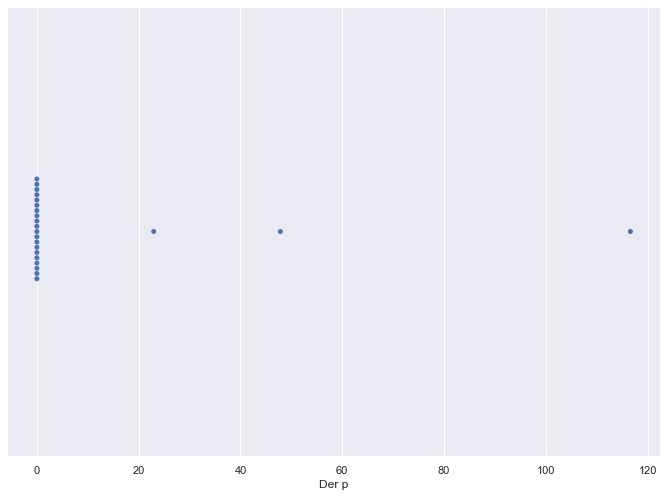

In [51]:
sns.swarmplot(control_df["Der p"])

## Some easy functions

Universal boxplot function to use for EVERYTHING

https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/

According to this, seems like Spearman Rank correlation is the way to go.
Or Mann-Whitney U test - https://statistics.laerd.com/statistical-guides/mann-whitney-u-test-assumptions.php



In [7]:
!pip install statannotations

In [8]:
from statannotations.Annotator import Annotator

def ezboxplot(separator, allergen, cutoff, df):
    new_df = df.filter([separator, allergen], axis=1)
    
    # Function to categorise into sensitised to separator, and not
    def categorise(row):
        if row[separator] > cutoff:
            return "Yes"
        else:
            return "No"
        
    new_df["Sensitised"] = new_df.apply(categorise, axis=1)
    
    # Split into 2 and print out stats
    sensitised_df = new_df[new_df["Sensitised"] == "Yes"]
    no_sensitised_df = new_df[new_df["Sensitised"] == "No"]
    
    # print(f"Sensitised mean: {sensitised_df[allergen].mean()}, SD: {sensitised_df[allergen].std()}")
    # print(f"Not sensitised mean: {no_sensitised_df[allergen].mean()}, SD: {no_sensitised_df[allergen].std()}")

    u, p = stats.mannwhitneyu(sensitised_df[allergen], no_sensitised_df[allergen])
    # print(u, p)
    
    # Theme
    sns.set_style("whitegrid")
    
    f, ax = plt.subplots(figsize=(4, 6))
    ax = sns.boxplot(x="Sensitised", y=allergen, data=new_df, order=["No", "Yes"],
                     width=0.3, linewidth=3, showfliers=False, palette="Blues")
    ax = sns.stripplot(x="Sensitised", y=allergen, data=new_df, order=["No", "Yes"],
                       linewidth=1, edgecolor='gray', palette="Blues")
    ax.set_yscale('log')
    ax.set_ylim([1, 1000])
    
    sns.despine(ax=ax)
    
    pairs = [("Yes", "No")]
    annotator = Annotator(ax, pairs, data=new_df, x="Sensitised",
                          y=allergen)
    annotator.configure(text_format="simple", text_offset=4)
    annotator.set_pvalues_and_annotate([p])
    
    plt.xlabel(f"Sensitised to {separator}", fontsize=13)
    plt.ylabel(f"{allergen} sIgE (IU/mL)", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # plt.xticks([0, 1], ["No", "Yes"])
    
    print(new_df["Sensitised"].value_counts())

No vs. Yes: Custom statistical test, P_val:7.671e-14
No     105
Yes     26
Name: Sensitised, dtype: int64


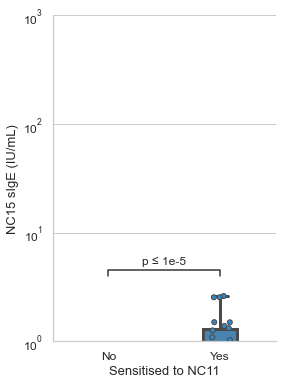

In [10]:
test = ezboxplot("NC11", "NC15", 0.35, full_df)

In [76]:
def quartile_boxplot(separator, allergen, df):
    new_df = df.filter([separator, allergen], axis=1)
    
    # Split into quartiles
    new_df["Quartiles"] = pd.qcut(new_df[separator], 4, 
                                  labels=["Q1", "Q2", "Q3", "Q4"])
    
    q1 = new_df[new_df["Quartiles"] == "Q1"]
    q2 = new_df[new_df["Quartiles"] == "Q2"]
    q3 = new_df[new_df["Quartiles"] == "Q3"]
    q4 = new_df[new_df["Quartiles"] == "Q4"]

    u1, p1 = stats.mannwhitneyu(q1[allergen], q2[allergen])
    u2, p2 = stats.mannwhitneyu(q2[allergen], q3[allergen])
    u3, p3 = stats.mannwhitneyu(q3[allergen], q4[allergen])
    u4, p4 = stats.mannwhitneyu(q1[allergen], q4[allergen])
    p = [p1, p2, p3, p4]
    # p = [p4]
    # print(u, p)
    
    # Theme
    sns.set_style("whitegrid")
    
    f, ax = plt.subplots(figsize=(2.5, 5))
    with plt.rc_context({'lines.linewidth': 0.8}):
        ax = sns.pointplot(x="Quartiles", y=allergen, order=["Q1", "Q2", "Q3", "Q4"], 
                           data=new_df, color='black')
    plt.axhline(y=0, color='b', linestyle='-')
    ax = sns.boxplot(x="Quartiles", y=allergen, data=new_df, order=["Q1", "Q2", "Q3", "Q4"],
                     width=0.3, linewidth=3, showfliers=False, palette="Blues")
    # ax = sns.stripplot(x="Quartiles", y=allergen, data=new_df, order=["Q1", "Q2", "Q3", "Q4"],
    #                    linewidth=1, edgecolor='gray', palette="Blues")
    
    sns.despine(ax=ax)
    
    pairs = [("Q1","Q2"), ("Q2","Q3"), ("Q3","Q4"), ("Q1","Q4")]
    # pairs = [("Q1","Q4")]
    annotator = Annotator(ax, pairs, data=new_df, x="Quartiles",
                          y=allergen)
    annotator.configure(text_format="simple", text_offset=4)
    annotator.set_pvalues_and_annotate(p)
    
    plt.xlabel(f"Sensitisation Quartile for {separator}", fontsize=13)
    plt.ylabel(f"{allergen} sIgE (IU/mL)", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    # plt.xticks([0, 1], ["No", "Yes"])
    
    print(new_df["Quartiles"].value_counts())

C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:1.124e-03
Q2 vs. Q3: Custom statistical test, P_val:8.851e-03
Q3 vs. Q4: Custom statistical test, P_val:5.978e-03
Q1 vs. Q4: Custom statistical test, P_val:5.375e-09
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


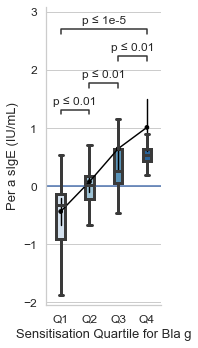

In [77]:
quartile_boxplot("Bla g", "Per a", full_df)

In [13]:
# Test out qcut
pd.qcut(full_df["Der p"], 4, labels=[0, 1, 2, 3])

0      1
1      1
2      0
3      1
4      1
      ..
126    0
127    3
128    1
129    0
130    0
Name: Der p, Length: 131, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [10]:
# R2 value to be annotated separately

def ezscatter(allergen1, allergen2, df):
    f, ax = plt.subplots(figsize=(4, 4))
    
    sns.set_style("whitegrid")
    # Get pearson correlation
    r, p = stats.pearsonr(full_df[allergen1], full_df[allergen2])
    ax = sns.regplot(x=allergen1, y=allergen2, data=df, truncate=False,
                     marker=".", scatter_kws={"alpha":0.5,"s":20})
    ax.xaxis.grid(False)
    sns.despine(ax=ax)
    
    plt.xlabel(f"{allergen1}", fontsize=13)
    plt.ylabel(f"{allergen2}", fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

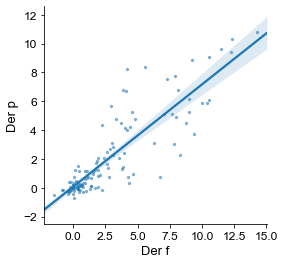

In [10]:
test = ezscatter("Der f", "Der p", full_df)

In [172]:
# Not sure if it should be CI of the odds ratio of control VS case, or CI
# of the sensitisation level
def ez_ci(df):
    pass

## 1st Level: Sensitisation to Novel Foods

Initial distribution of the different classes of foods (average) compared to Der p, Der f, Blo t

In [347]:
# Function for swarmplots
def plot_swarm(df, xlabel, ylabel, size):
    graph = sns.swarmplot(x="variable", y="value", data=pd.melt(df),
                          size=size, palette="Blues", linewidth=0.5)
    ax = plt.gca()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [20]:
insect_df.columns[18:30]

Index(['BSF-WT CF70', 'BSF-WT P', 'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH',
       'BSF-WT SBM', 'BSF-WT OKA', 'BSF-D M<P', 'BSF-D M', 'BSF-D PKM',
       'BSF-D NUS', 'BSF-D COH'],
      dtype='object')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot

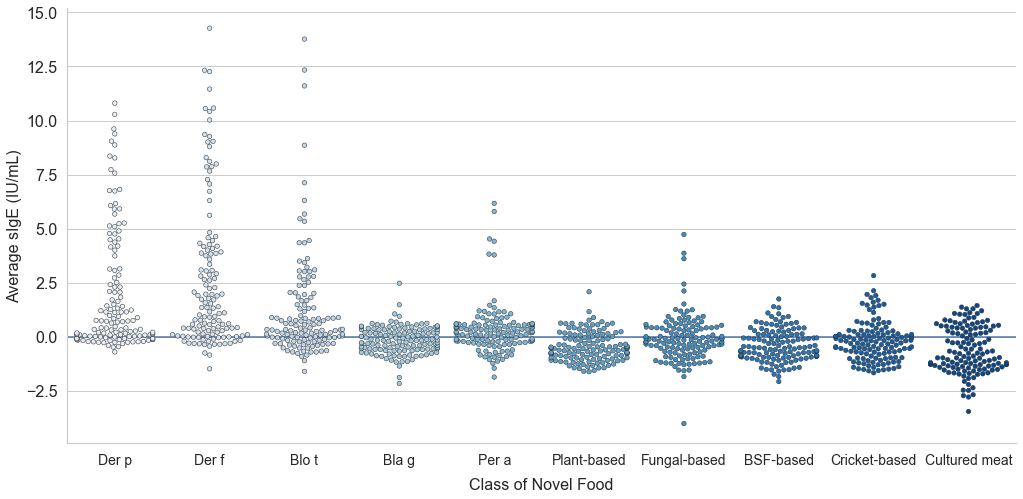

In [55]:
# We use the full dataset for this - full_df
# Create new columns for average IgE for each class of food
plant_df["Average"] = plant_df.iloc[:,16:].mean(numeric_only=True, axis=1)
fungal_df["Average"] = fungal_df.iloc[:,1:].mean(numeric_only=True, axis=1)
insect_df["All BSF Average"] = insect_df.iloc[:,18:34].mean(numeric_only=True, axis=1)
insect_df["BSF Average"] = insect_df.iloc[:,18:30].mean(numeric_only=True, axis=1)
insect_df["Cric Average"] = insect_df.iloc[:,34:41].mean(numeric_only=True, axis=1)
insect_df["NC Average"] = insect_df.iloc[:,34:37].mean(numeric_only=True,axis=1)

# Create dataframe for all averages and dust mites
ini_df = pd.DataFrame({
    "Der p": full_df["Der p"], 
    "Der f": full_df["Der f"], 
    "Blo t": full_df["Blo t"], 
    "Bla g": full_df["Bla g"], 
    "Per a": full_df["Per a"], 
    "Plant-based": plant_df["Average"], 
    "Fungal-based": fungal_df["Average"],
    "BSF-based": insect_df["All BSF Average"], 
    "Cricket-based": insect_df["Cric Average"],
    "Cultured meat": cultured_df["Cultured meat"]
})

graph = sns.swarmplot(x="variable", y="value", data=pd.melt(ini_df),
                      size=4.5, palette="Blues", linewidth=0.5)
# graph.axhline(y=0, color="blue", linestyle="--")

sns.set(rc={'figure.figsize':(17,8)})
sns.despine(ax=graph)
sns.set_style("whitegrid")
# ax = plt.gca()
# ax.set_ylim([0, 1000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel("Class of Novel Food", fontsize=16)
plt.ylabel("Average sIgE (IU/mL)", fontsize=16)
plt.axhline(y=0, color='b', linestyle='-')
graph.xaxis.labelpad = 10
# ini_df.head()

plt.savefig('Thesis figures/swarm_all.png', dpi=600)

Compare across the different classes of novel foods (still doing an average)
- Boxplot with significance test

Compare across different ingredient make up (for plant-based foods)

Compare for same ingredient, but across different companies

Compare between the different ingredients for a particular company

Compare across different companies, but same ingredient

### Now for BSFs

Compare between wildtype and lab strain (line D) (18:34)

Compare between crickets (34:41)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot

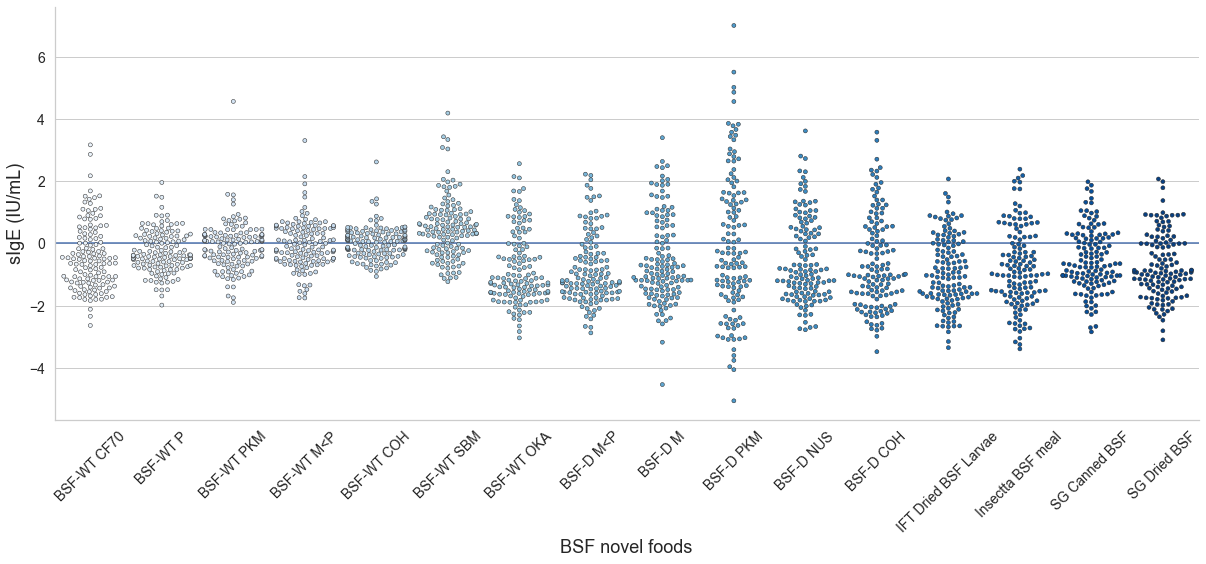

In [18]:
# Overall swarmplot
graph = sns.swarmplot(x="variable", y="value", data=pd.melt(insect_df.iloc[:,18:34]),
                      size=4, linewidth=0.5, palette="Blues")
# graph.axhline(y=cut_off, color="red")

ax = plt.gca()
sns.despine(ax=graph)
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("BSF novel foods", fontsize=18)
plt.ylabel("sIgE (IU/mL)", fontsize=18)
plt.axhline(y=0, color='b', linestyle='-')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Figures/swarm_bsf.png', dpi=600)

Compare between the different feeds

In [105]:
bsf_wt.columns

Index(['BSF-WT CF70', 'BSF-WT P', 'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH',
       'BSF-WT SBM', 'BSF-WT OKA'],
      dtype='object')

BSF-WT CF70 vs. BSF-WT P: Custom statistical test, P_val:1.588e-02
BSF-WT CF70 vs. BSF-WT PKM: Custom statistical test, P_val:1.709e-04
BSF-WT CF70 vs. BSF-WT M<P: Custom statistical test, P_val:4.263e-05
BSF-WT CF70 vs. BSF-WT COH: Custom statistical test, P_val:2.176e-07
BSF-WT CF70 vs. BSF-WT SBM: Custom statistical test, P_val:1.126e-12
BSF-WT CF70 vs. BSF-WT OKA: Custom statistical test, P_val:1.926e-03


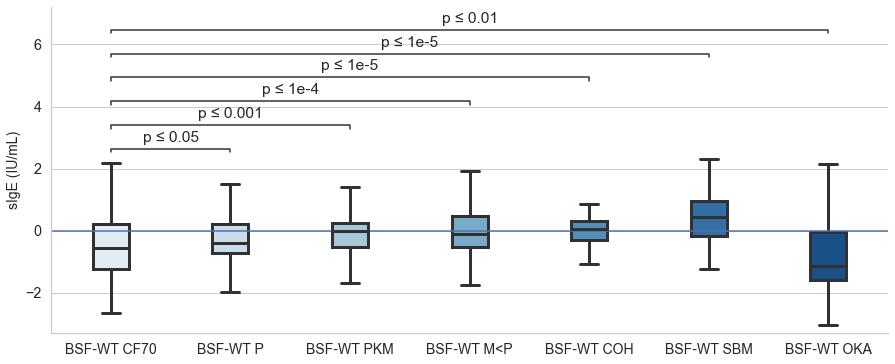

In [48]:
bsf_wt = insect_df.iloc[:,18:25]
bsf_d = insect_df.iloc[:,25:30]

sns.set_style("whitegrid")
# ax = sns.swarmplot(data=bsf_wt, size=4, linewidth=0.5, palette="Blues")
ax = sns.boxplot(data=bsf_wt, width=0.3, linewidth=3, showfliers=False, palette="Blues")
sns.despine(ax=ax)

# ax.axhline(y=cut_off, color="red")
# sns.set(font_scale=20)
plt.ylabel("sIgE (IU/mL)", fontsize=14)

p_values = []
pairs = []

# Compare each group to the control BSF-WT CF70
for bsf in bsf_wt.columns:
    if bsf == "BSF-WT CF70":
        continue
    u, p = stats.mannwhitneyu(bsf_wt["BSF-WT CF70"], bsf_wt[bsf])
    p_values.append(p)
    pairs.append(("BSF-WT CF70", bsf))

sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.3)
plt.xticks(fontsize=14)
annotator = Annotator(ax, pairs, data=bsf_wt)
annotator.configure(text_format="simple", text_offset=4)
annotator.set_pvalues_and_annotate(p_values)

plt.axhline(y=0, color='b', linestyle='-')
plt.savefig('Figures/box_bsf_wt.png', dpi=600)

C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:4.827e-02
Q2 vs. Q3: Custom statistical test, P_val:1.388e-02
Q3 vs. Q4: Custom statistical test, P_val:9.008e-01
Q1 vs. Q4: Custom statistical test, P_val:5.350e-04
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


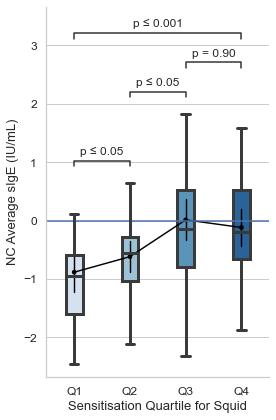

In [18]:
# Seems like SBM BSF have higher sensitisation. Let's look at their relationship to soy
# sns.set(rc={'figure.figsize':(6,10)})
sns.set(font_scale=1)
quartile_boxplot("Squid", "NC Average", insect_df)
# plt.savefig('Figures/box_soy_wtsbm.png', dpi=1200)

BSF-D M<P vs. BSF-D PKM: Custom statistical test, P_val:7.032e-03


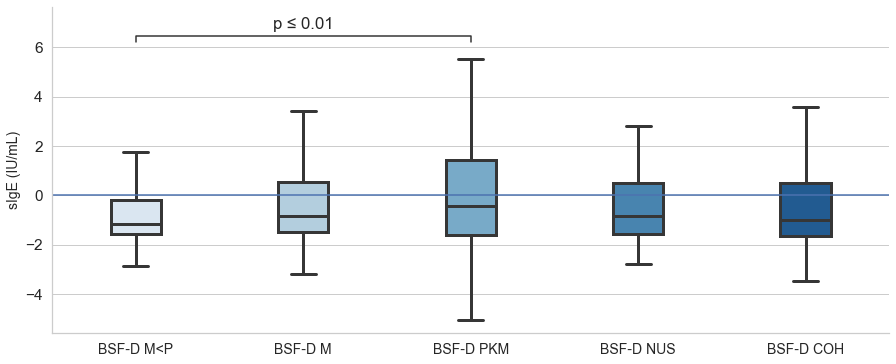

In [45]:
# For line D
sns.set_style("whitegrid")
ax = sns.boxplot(data=bsf_d, width=0.3, linewidth=3, showfliers=False, palette="Blues")
sns.despine(ax=ax)

# ax.axhline(y=cut_off, color="red")
# sns.set(font_scale=20)
plt.ylabel("sIgE (IU/mL)", fontsize=14)

p_values = []
pairs = []

# prev_col = ""
# for bsf in bsf_d.columns:
#     if prev_col == "":
#         prev_col = bsf
#         continue
#     u, p = stats.mannwhitneyu(bsf_d[prev_col], bsf_d[bsf])
#     p_values.append(p)
#     pairs.append((prev_col, bsf))
#     prev_col = bsf
    
# Include one more comparing M<P and PKM
u, p = stats.mannwhitneyu(bsf_d["BSF-D M<P"], bsf_d["BSF-D PKM"])
p_values.append(p)
pairs.append(("BSF-D M<P", "BSF-D PKM"))

sns.set(rc={'figure.figsize':(15,6)}, font_scale=1.4)
plt.xticks(fontsize=14)
annotator = Annotator(ax, pairs, data=bsf_d)
annotator.configure(text_format="simple", text_offset=4)
annotator.set_pvalues_and_annotate(p_values)

plt.axhline(y=0, color='b', linestyle='-')
# plt.tight_layout()
plt.savefig('Figures/box_bsfd.png', dpi=600)

BSF-WT COH vs. BSF-D COH: Custom statistical test, P_val:6.312e-07


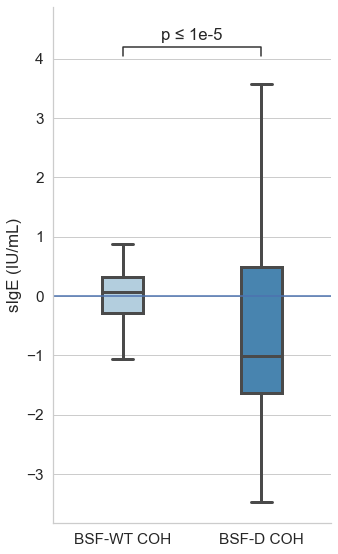

In [53]:
# Compare between WT and line D with the same feed
insect_df.columns

# In common are M<P, PKM and COH
feed = "COH"
wt = "BSF-WT " + feed
d = "BSF-D " + feed

# For Supergrubs
# wt = "SG Dried BSF"
# d = "SG Canned BSF"

# sns.set(font_scale=200)
sns.set(rc={'figure.figsize':(5,8)}, font_scale=1.4)
# sns.set_context("paper", font_scale=0.9)  
# ax.set_ylim([0, 400])
sns.set_style("whitegrid")
ax = sns.boxplot(data=insect_df[[wt, d]], width=0.3, linewidth=3, 
                 showfliers=False, palette="Blues")
sns.despine(ax=ax)

# ax.axhline(y=cut_off, color="red")

plt.ylabel("sIgE (IU/mL)")
# plt.yticks(fontsize=14)

p_values = []
pairs = [(wt, d)]

u, p = stats.mannwhitneyu(insect_df[wt], insect_df[d])
p_values.append(p)

# plt.xticks(fontsize=14)
annotator = Annotator(ax, pairs, data=insect_df[[wt, d]])
annotator.configure(text_format="simple", text_offset=4)
annotator.set_pvalues_and_annotate(p_values)

plt.axhline(y=0, color='b', linestyle='-')
plt.tight_layout()
plt.savefig('Figures/box_wtVSd_coh.png', dpi=1200)

### Deeper look into crickets

Actually there doesn't seem to be much to talk about here...

## 2nd Level: Sensitisation to bases

### BSF

For BSFs, we will take the entire average and compare to other bases

In [56]:
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'SGC Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'All BSF Average', 'BSF Average', 'Cric Average', 'NC Average'],
      dtype='object')

In [57]:
# Change SGC Arginine kinase into AS Arginine kinase
insect_df = insect_df.rename(columns = {"SGC Arginine kinase": "AS Arginine kinase"})
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'AS Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'All BSF Average', 'BSF Average', 'Cric Average', 'NC Average'],
      dtype='object')

In [58]:
# Make new column: BSF product Average
insect_df["BSF product Average"] = insect_df[["IFT Dried BSF Larvae", "Insectta BSF meal",
                                              "SG Canned BSF", "SG Dried BSF"]].mean(numeric_only=True,axis=1)
insect_df["Cric product Average"] = insect_df[["C Cricket protein powder", "N Cricket flour",
                                               "SG Dried Crickets", "AIFS Cricket flour"]].mean(numeric_only=True, axis=1)
insect_df["Cric product Average"]

0      0.504066
1      0.783901
2      0.587312
3     -1.266310
4      2.658995
         ...   
126   -0.256761
127   -1.071999
128   -1.004811
129   -1.526192
130   -1.727082
Name: Cric product Average, Length: 131, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:6.860e-02
Q2 vs. Q3: Custom statistical test, P_val:3.414e-01
Q3 vs. Q4: Custom statistical test, P_val:5.331e-01
Q1 vs. Q4: Custom statistical test, P_val:1.865e-01
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:1.509e-01
Q2 vs. Q3: Custom statistical test, P_val:1.330e-01
Q3 vs. Q4: Custom statistical test, P_val:4.122e-01
Q1 vs. Q4: Custom statistical test, P_val:1.831e-03
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:7.409e-05
Q2 vs. Q3: Custom statistical test, P_val:2.150e-01
Q3 vs. Q4: Custom statistical test, P_val:2.704e-02
Q1 vs. Q4: Custom statistical test, P_val:3.762e-08
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


Q1 vs. Q2: Custom statistical test, P_val:7.078e-03
Q2 vs. Q3: Custom statistical test, P_val:4.273e-01
Q3 vs. Q4: Custom statistical test, P_val:2.849e-01
Q1 vs. Q4: Custom statistical test, P_val:2.212e-04
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


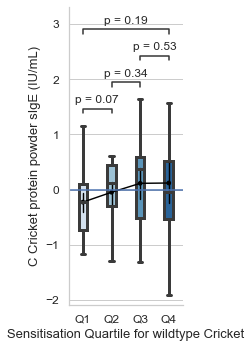

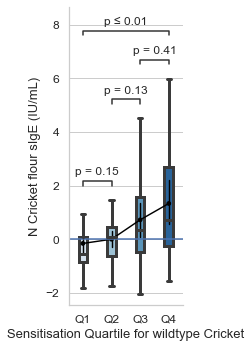

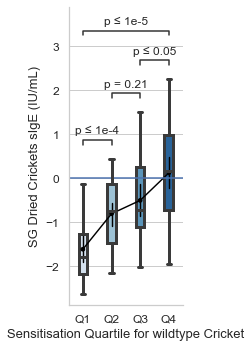

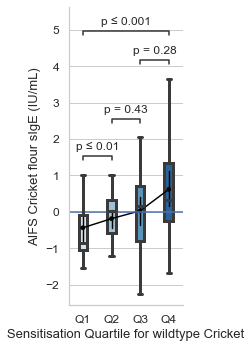

In [103]:
# Can use "BSF Average" in insect_df
bsf_list = ["BSF Tropomyosin 1", "BSF Tropomyosin 2", "BSF Arginine kinase", "Der p", "Der f", "Blo t",
            "Grey Prawn", "Mussel", "Squid"]
cricket_list = ["TE Tropomyosin 1", "AS Arginine kinase", "Der p", "Der f", "Blo t",
                "Grey Prawn", "Mussel", "Squid"]
commercial_bsf = ["IFT Dried BSF Larvae", "Insectta BSF meal", "SG Canned BSF", "SG Dried BSF"]
commercial_cric = ["C Cricket protein powder", "N Cricket flour", "SG Dried Crickets", 
                   "AIFS Cricket flour"]

for sample in commercial_cric:
    quartile_boxplot("NC Average", sample, insect_df)
    # plt.ylabel("Commercial Cricket sIgE (IU/mL)")
    plt.xlabel("Sensitisation Quartile for wildtype Cricket")
    filename = "Thesis figures/" + "NCavg" + "VS" + sample
    # plt.savefig(filename, dpi=600, bbox_inches='tight')

Cumulative curve for Trop/AK, can use for both BSF and cricket (just change the names accordingly)

In [109]:
# Build the curve for trop/AK building for BSF
cut_off = 0.35 # Either 0.35 or 3.5 (different levels of allergy)

def sensitised(x):
    if x > cut_off:
        return 1
    return 0

insect_df["0"] = insect_df["Der p 10"].apply(sensitised)
insect_df["1"] = insect_df["Der p 20"].apply(sensitised)
insect_df["2"] = insect_df["Der f 10"].apply(sensitised)
insect_df["3"] = insect_df["Blo t 10"].apply(sensitised)
insect_df["4"] = insect_df["Blo t 20"].apply(sensitised)
insect_df["5"] = insect_df["BSF Tropomyosin 1"].apply(sensitised)
insect_df["6"] = insect_df["BSF Tropomyosin 2"].apply(sensitised)
insect_df["7"] = insect_df["BSF Arginine kinase"].apply(sensitised)
insect_df["8"] = insect_df["BSF Average"].apply(sensitised)
insect_df["9"] = insect_df["TE Tropomyosin 1"].apply(sensitised)
insect_df["10"] = insect_df["AS Arginine kinase"].apply(sensitised)
# insect_df["11"] = insect_df["Squid"].apply(sensitised)
# insect_df["11"] = insect_df["Cric Average"].apply(sensitised)
insect_df["11"] = plant_df["Mung beans"].apply(sensitised)

# Filter out those sensitised to BSF
# bsf_sen_df = insect_df[insect_df["8"] == 1]
cric_sen_df = insect_df[insect_df["11"] == 1]

# Add up sequentially the sensitisations of trop/AK
for i in range(1,12):
    # bsf_sen_df[str(i)] += bsf_sen_df[str(i-1)]
    cric_sen_df[str(i)] += cric_sen_df[str(i-1)]
    
# bsf_sen_df["7"].value_counts()
cric_sen_df["11"].value_counts()

C:\Users\USER\AppData\Local\Temp/ipykernel_5732/520310361.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cric_sen_df[str(i)] += cric_sen_df[str(i-1)]


6     7
1     6
7     5
5     4
2     3
3     3
4     1
8     1
11    1
10    1
Name: 11, dtype: int64

In [110]:
len(cric_sen_df)

32

In [111]:
# Plot the building curve
percentages = []

for i in range(10):
    # percentages.append(len(bsf_sen_df[bsf_sen_df[str(i)] > 0]) / len(bsf_sen_df))
    percentages.append(len(cric_sen_df[cric_sen_df[str(i)] > 0]) / len(cric_sen_df))
    
# Convert into df
percen_df = pd.DataFrame(percentages)
percen_df = percen_df.transpose()
percen_df.columns = ["Der p 10", "Der p 20", "Der f 10", "Blo t 10", "Blo t 20",
                     "BSF Tropomyosin 1", "BSF Tropomyosin 2", "BSF Arginine kinase",
                     "TE Tropomyosin 1", "AS Arginine kinase"]

percentages

[0.5, 0.53125, 0.59375, 0.59375, 0.59375, 0.625, 0.6875, 0.75, 0.78125, 0.8125]

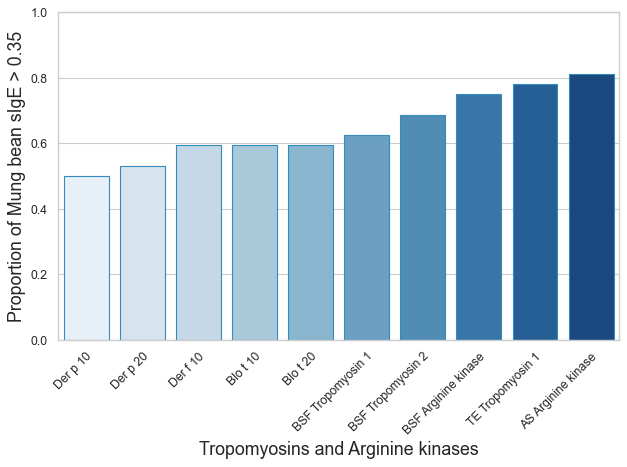

In [112]:
# Test out bar plot
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
# sns.set_context(rc = {'patch.linewidth': 0.0})
ax = sns.barplot(x="variable", y="value", data=pd.melt(percen_df), 
                 palette="Blues", edgecolor="#348ABD")
ax.set_xticklabels(labels=percen_df.columns, rotation=45, 
                   ha="right", rotation_mode="anchor")
plt.ylim((0,1))
plt.ylabel("Proportion of Mung bean sIgE > 0.35", fontsize=16)
plt.xlabel("Tropomyosins and Arginine kinases", fontsize=16)

plt.tight_layout()
plt.savefig('Figures/cumu_mungbean.png', dpi=1200)

### Crickets

Compare cricket products to the actual crickets, cricket recombinant proteins, and dust mite recombinant proteins

Cricket species: Lebinthus luae

In [119]:
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'AS Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'All BSF Average', 'BSF Average', 'Cric Average', 'NC Average',
       'Wheat germ', 'BSF product Average', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11'],
      dtype='object')

Q1 vs. Q2: Custom statistical test, P_val:1.368e-01
Q2 vs. Q3: Custom statistical test, P_val:2.849e-01
Q3 vs. Q4: Custom statistical test, P_val:7.879e-01
Q1 vs. Q4: Custom statistical test, P_val:1.959e-02
Q1    33
Q2    33
Q4    33
Q3    32
Name: Quartiles, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


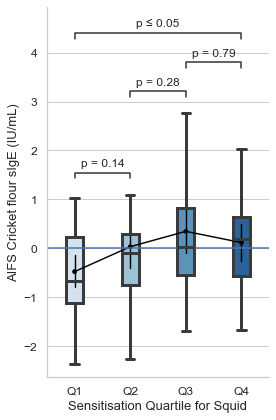

In [40]:
# Compare crickets to its cricket bases. We use "NC Average"
# ezboxplot("NC Average", "AIFS Cricket flour", 1, insect_df)
# insect_df["Wheat germ"] = full_df["Wheat germ"]
quartile_boxplot("Squid", "AIFS Cricket flour", insect_df)
# plt.savefig('Figures/box_squidVSncavg.png', dpi=1200)

In [538]:
cric_df.dtypes

NC Average                  float64
SG Dried Crickets           float64
N Cricket flour             float64
AIFS Cricket flour          float64
C Cricket protein powder    float64
dtype: object

NC Average vs. SG Dried Crickets: Custom statistical test, P_val:2.332e-02
NC Average vs. N Cricket flour: Custom statistical test, P_val:1.136e-05
NC Average vs. AIFS Cricket flour: Custom statistical test, P_val:4.621e-03
NC Average vs. C Cricket protein powder: Custom statistical test, P_val:6.791e-05


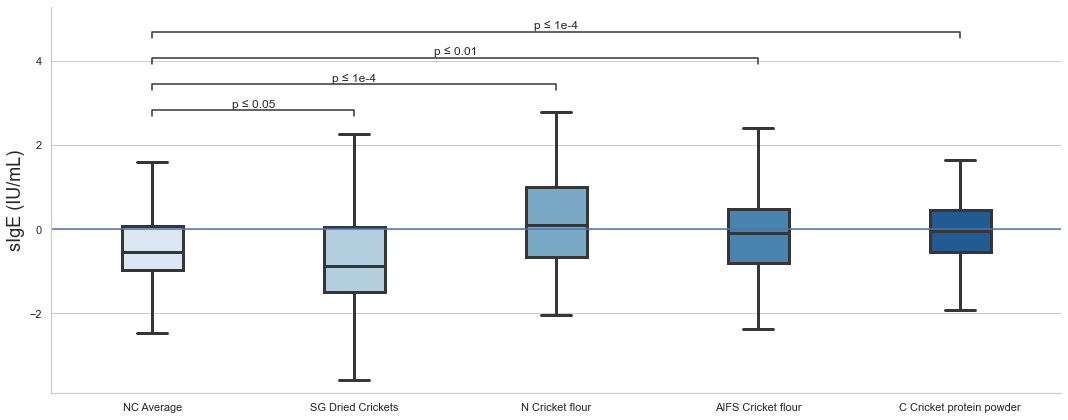

In [43]:
order = ["NC Average", "SG Dried Crickets", "N Cricket flour",
         "AIFS Cricket flour", "C Cricket protein powder"]
cric_df = insect_df[order]

sns.set(rc={'figure.figsize':(15,6)})
sns.set_style("whitegrid")
# ax = sns.swarmplot(data=bsf_wt, size=4, linewidth=0.5, palette="Blues")
ax = sns.boxplot(data=cric_df, width=0.3, linewidth=3, showfliers=False, 
                 palette="Blues")
# ax = sns.stripplot(data=cric_df, linewidth=1, edgecolor='gray', palette="Blues")
sns.despine(ax=ax)

# ax.axhline(y=cut_off, color="red")
# sns.set(font_scale=7)
plt.ylabel("sIgE (IU/mL)", fontsize=18)

p_values = []
pairs = []

# Compare each group to NC average
for cric in cric_df.columns:
    if cric == "NC Average":
        continue
    u, p = stats.mannwhitneyu(cric_df["NC Average"], cric_df[cric])
    p_values.append(p)
    pairs.append(("NC Average", cric))

annotator = Annotator(ax, pairs, data=cric_df)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.axhline(y=0, color='b', linestyle='-')
plt.tight_layout()
plt.savefig('Figures/box_crickets.png', dpi=1200)

Interestingly, all cricket products have association with base cricket average, EXCEPT the protein powder. 

We can also look at the odds ratio to see if the ingredient make up can make a difference

## 3rd Level: Heat Treatment

For BSFs

In [7]:
insect_cooked = insect_cooked.rename(columns={"BSF-WT MIX1 #": "BSF-WT M<P #",
                              "BSF-D MIX1 #": "BSF-D M<P #"})
insect_cooked["NC Average #"] = insect_cooked[["NC10 #", "NC11 #", "NC15 #"]].mean(numeric_only=True, axis=1)
insect_cooked.columns

Index(['BSF-WT CF70 #', 'BSF-WT PKM #', 'BSF-WT M<P #', 'BSF-WT COH #',
       'BSF-WT SBM #', 'BSF-WT OKA #', 'BSF-WT P #', 'BSF-D PKM #',
       'BSF-D M<P #', 'BSF-D COH #', 'BSF-D M #', 'BSF-D NUS #', 'NC10 #',
       'NC11 #', 'NC15 #', 'C Cricket protein powder #', 'N Cricket flour #',
       'AIFS Cricket flour #', 'SG Canned BSF #', 'SG Dried BSF #',
       'SG Dried Crickets #', 'IFT Dried BSF Larvae #', 'Insectta BSF meal #',
       'NC Average #'],
      dtype='object')

C Cricket protein powder vs. C Cricket protein powder #: Custom statistical test, P_val:8.461e-01


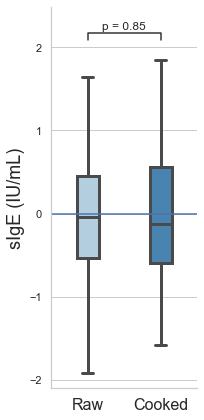

In [57]:
_type = "D"
feed = "COH"
raw = "BSF-" + _type + " " + feed
raw = "C Cricket protein powder"
cooked = raw + " #"
# cooked = "SG Canned BSF #"
bsf_heat_df = pd.concat([insect_df[raw], insect_cooked[cooked]], axis=1)

sns.set(rc={'figure.figsize':(3,6)})
# ax = sns.boxplot(data=bsf_heat_df)
sns.set_style("whitegrid")
ax = sns.boxplot(data=bsf_heat_df, width=0.3, linewidth=3, 
                 showfliers=False, palette="Blues")
sns.despine(ax=ax)

ax.axhline(y=0, color="b", linestyle="-")

plt.ylabel("sIgE (IU/mL)", fontsize=18)
plt.xticks([0, 1], ["Raw", "Cooked"], fontsize=16)
# plt.xticks([0, 1], ["Chirps", "Cooked Chirps"], fontsize=16)

p_values = []
pairs = [(raw, cooked)]

u, p = stats.mannwhitneyu(insect_df[raw], insect_cooked[cooked])
p_values.append(p)

annotator = Annotator(ax, pairs, data=bsf_heat_df)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()
plt.savefig('Figures/box_heat_chirpscricket.png', dpi=1200)

In [66]:
insect_df.columns

Index(['Der p 10', 'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p',
       'Der f', 'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'AS Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'All BSF Average', 'BSF Average', 'Cric Average', 'NC Average',
       'BSF product Average'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp/ipykernel_16744/2878777532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_bsf_df["Cooked BSF Average"] = insect_cooked["BSF Average"]


BSF Average vs. Dried BSF Average: Custom statistical test, P_val:2.160e-05
BSF Average vs. SG Canned BSF: Custom statistical test, P_val:2.273e-02
BSF Average vs. Cooked BSF Average: Custom statistical test, P_val:5.038e-03


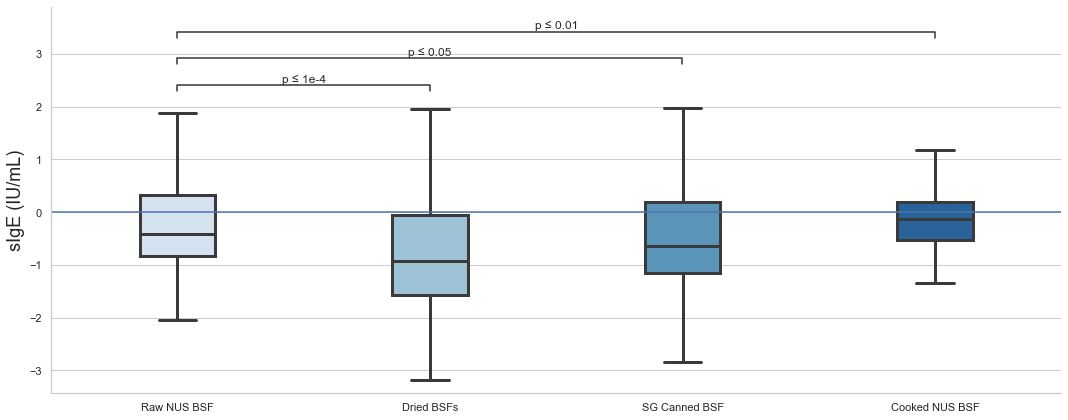

In [13]:
# BSF Average VS BSF cooked Average VS Dried VS Canned
# BSF Cooked Average
insect_cooked["BSF Average"] = insect_cooked.iloc[:,:12].mean(numeric_only=True, axis=1)
# Dried Average
insect_df["Dried BSF Average"] = insect_df[["IFT Dried BSF Larvae", "Insectta BSF meal",
                                            "SG Dried BSF"]].mean(numeric_only=True, axis=1)

# Filter the dataset
heat_bsf_df = insect_df[["BSF Average", "Dried BSF Average", "SG Canned BSF"]]
heat_bsf_df["Cooked BSF Average"] = insect_cooked["BSF Average"]

sns.set_style("whitegrid")
ax = sns.boxplot(data=heat_bsf_df, width=0.3, linewidth=3, showfliers=False, palette="Blues")
sns.despine(ax=ax)

plt.ylabel("sIgE (IU/mL)", fontsize=18)

p_values = []
pairs = []

for i in range(len(heat_bsf_df.columns)):
    if i == 0:
        continue
    u, p = stats.mannwhitneyu(heat_bsf_df["BSF Average"], heat_bsf_df.iloc[:,i])
    p_values.append(p)
    pairs.append(("BSF Average", heat_bsf_df.columns[i]))

# Include one more comparing M<P and PKM
# u, p = stats.mannwhitneyu(bsf_d["BSF-D M<P"], bsf_d["BSF-D PKM"])
# p_values.append(p)
# pairs.append(("BSF-D M<P", "BSF-D PKM"))

sns.set(rc={'figure.figsize':(15,6)})
annotator = Annotator(ax, pairs, data=heat_bsf_df)
annotator.configure(text_format="simple")
annotator.set_pvalues_and_annotate(p_values)
# fig, ax = plt.subplots()
ax.set_xticklabels(["Raw NUS BSF", "Dried BSFs", "SG Canned BSF", "Cooked NUS BSF"])
# plt.xticks(rotation=45)

plt.axhline(y=0, color='b', linestyle='-')
plt.tight_layout()
plt.savefig('Figures/box_bsf_treatments.png', dpi=1200)

## 4th level: Clustering

See the difference between the different clusters as a method of deriving likelihood

In [611]:
# Import dataset
insect_clustered = pd.read_csv("C:/FYP/Analysis/insect_clustered.csv")
insect_clustered.columns

Index(['ID', 'AR_class', 'AD_class', 'asthma_class', 'SPT_0', 'Der p 10',
       'Der p 20', 'Der f 10', 'Blo t 10', 'Blo t 20', 'Der p', 'Der f',
       'Blo t', 'Bla g', 'Per a', 'Grey Prawn', 'Mussel', 'Squid',
       'BSF Tropomyosin 1', 'BSF Tropomyosin 2', 'BSF Arginine kinase',
       'TE Tropomyosin 1', 'AS Arginine kinase', 'BSF-WT CF70', 'BSF-WT P',
       'BSF-WT PKM', 'BSF-WT M<P', 'BSF-WT COH', 'BSF-WT SBM', 'BSF-WT OKA',
       'BSF-D M<P', 'BSF-D M', 'BSF-D PKM', 'BSF-D NUS', 'BSF-D COH',
       'IFT Dried BSF Larvae', 'Insectta BSF meal', 'SG Canned BSF',
       'SG Dried BSF', 'NC10', 'NC11', 'NC15', 'C Cricket protein powder',
       'N Cricket flour', 'SG Dried Crickets', 'AIFS Cricket flour',
       'BSF Average', 'Cric Average', 'NC Average', 'All BSF Average',
       'BSF-WT CF70 #', 'BSF-WT PKM #', 'BSF-WT MIX1 #', 'BSF-WT COH #',
       'BSF-WT SBM #', 'BSF-WT OKA #', 'BSF-WT P #', 'BSF-D PKM #',
       'BSF-D MIX1 #', 'BSF-D COH #', 'BSF-D M #', 'BSF-D NUS #', 

In [624]:
# Split into clusters
# cluster_of_2
two_1 = insect_clustered[insect_clustered["cluster_of_2"] == 1]
two_2 = insect_clustered[insect_clustered["cluster_of_2"] == 2]
cluster2 = [two_1, two_2]

# cluster_of_4
four_1 = insect_clustered[insect_clustered["cluster_of_4"] == 1]
four_2 = insect_clustered[insect_clustered["cluster_of_4"] == 2]
four_3 = insect_clustered[insect_clustered["cluster_of_4"] == 3]
four_4 = insect_clustered[insect_clustered["cluster_of_4"] == 4]
cluster4 = [four_1, four_2, four_3, four_4]

# Print size of each cluster
print(f"two_1 size: {len(two_1)}")
print(f"two_2 size: {len(two_2)}")
print(f"four_1 size: {len(four_1)}")
print(f"four_2 size: {len(four_2)}")
print(f"four_3 size: {len(four_3)}")
print(f"four_4 size: {len(four_4)}")

two_1 size: 100
two_2 size: 25
four_1 size: 58
four_2 size: 42
four_3 size: 14
four_4 size: 11


four_3 and four_4 are rather small, but let's proceed

In [612]:
look_at_allergens = ["Der p", "Der f", "Blo t", "All BSF Average", "BSF Average", "Cric Average", "NC Average"]

In [639]:
# Function to print out the p-values, mean and SD
# Look at each allergen one by one
# cluster_dfs will be a list of dfs separated into their respective clusters
def cluster_analysis(allergen, cluster_dfs): # For 2 clusters
    print("================== " + allergen + " ==================")
    for i in range(len(cluster_dfs)-1):
        cluster1 = cluster_dfs[i]
        cluster2 = cluster_dfs[i+1]
        
        u, p = stats.mannwhitneyu(cluster1[allergen], cluster2[allergen])
        print(f"{i+1} VS {i+2}")
        print(allergen + " p-value: " + str(p))
        print("Significant? " + str(p < 0.05))
        print(str(i+1) + " mean: " + "{:.3f}".format(cluster1[allergen].mean()))
        print(str(i+1) + " SD: " + "{:.3f}".format(cluster1[allergen].std()))
        print(str(i+2) + " mean: " + "{:.3f}".format(cluster2[allergen].mean()))
        print(str(i+2) + " SD: " + "{:.3f}".format(cluster2[allergen].std()))
        print("")

In [640]:
for allergen in look_at_allergens:
    cluster_analysis(allergen, cluster4)

================== Der p ==================
1 VS 2
Der p p-value: 0.9972138757687741
Significant? False
1 mean: 2.077
1 SD: 2.633
2 mean: 2.261
2 SD: 3.135

2 VS 3
Der p p-value: 0.004148199455368385
Significant? True
2 mean: 2.261
2 SD: 3.135
3 mean: 0.089
3 SD: 0.376

3 VS 4
Der p p-value: 0.00014193609216169844
Significant? True
3 mean: 0.089
3 SD: 0.376
4 mean: 3.860
4 SD: 3.277

================== Der f ==================
1 VS 2
Der f p-value: 0.4612500334098206
Significant? False
1 mean: 3.069
1 SD: 3.384
2 mean: 2.822
2 SD: 3.599

2 VS 3
Der f p-value: 3.8632214896487255e-05
Significant? True
2 mean: 2.822
2 SD: 3.599
3 mean: -0.036
3 SD: 0.257

3 VS 4
Der f p-value: 2.8144323374222863e-05
Significant? True
3 mean: -0.036
3 SD: 0.257
4 mean: 4.624
4 SD: 3.645

================== Blo t ==================
1 VS 2
Blo t p-value: 0.3162594916444259
Significant? False
1 mean: 1.187
1 SD: 2.428
2 mean: 1.308
2 SD: 2.438

2 VS 3
Blo t p-value: 0.059737220393599105
Significant? False
2 m